In [3]:
import os

In [11]:
total = 0
exclude = set(['work-specific', 'graph_examples', 'til', 'supporting-images', '.vscode/', 'README.md', '.gitignore', 'example-datasets', 'notebook.ipynb'])
for root, dirs, files in os.walk(os.getcwd()):
    dirs[:] = [d for d in dirs if d not in exclude]
    total += len(files)
    
print(f"There are {total} files so far.")

There are 291 files so far.


In [4]:
import os

home = os.path.expanduser('~')

print(home)

path_to_file = os.path.join(home, 'my_folder')

print(path_to_file)


/home/adam
/home/adam/my_folder


<BarContainer object of 2 artists>

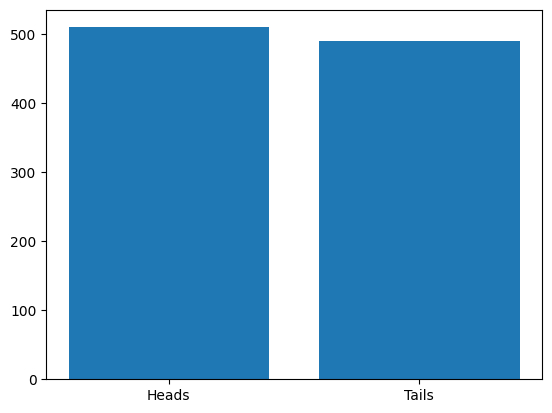

In [24]:
import numpy as np
import matplotlib.pyplot as plt

flips = 1000
outcomes = np.random.randint(0,2, size=flips)
adjusted_outcome = np.where(outcomes > 0, "Heads", "Tails")
unique, count = np.unique(adjusted_outcome, return_counts=True)

d = dict(zip(unique, count))
plt.bar(*zip(*d.items()))

# plt.bar(*zip(*d.items()))